#### Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

##### Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

#### Дополнительная часть (необязательная)

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
- не менее двух визуализаций должны быть интерактивными.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px

init_notebook_mode(connected=True)

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [3]:
def formate_df(df):
    
    rename_columns = {"Economy (GDP per Capita)": "Economy", "GDP per capita": "Economy",
                      "Economy..GDP.per.Capita.": "Economy", "Health..Life.Expectancy.": "Health",
                      "Healthy life expectancy": "Health", "Health (Life Expectancy)": "Health",
                      "Trust (Government Corruption)": "Trust", "Trust..Government.Corruption.": "Trust",
                      "Perceptions of corruption": "Trust", "Freedom to make life choices": "Freedom",
                      "Happiness.Rank": "Happiness Rank", "Happiness.Score": "Happiness Score",
                      "Overall rank": "Happiness Rank", "Score": "Happiness Score", 
                      "Country or region": "Country", "Dystopia.Residual": "Dystopia Residual"}
    
    df.rename(columns=rename_columns, inplace=True)
    try:
        df.drop("Region", axis=1, inplace=True)
    except:
        pass
    return df

        
new = {}
for year in range(2015,2020):
    df = pd.read_csv(f"{year}.csv")
    df = formate_df(df)
    new[year] = df
    
df = pd.concat(new).reset_index(level=1, drop=True)
df.dropna(axis=1, inplace=True)
df

,Country,Happiness Rank,Happiness Score,Economy,Health,Freedom,Generosity
2015,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.29678
2015,Iceland,2,7.561,1.30232,0.94784,0.62877,0.43630
2015,Denmark,3,7.527,1.32548,0.87464,0.64938,0.34139
2015,Norway,4,7.522,1.45900,0.88521,0.66973,0.34699
2015,Canada,5,7.427,1.32629,0.90563,0.63297,0.45811
...,...,...,...,...,...,...,...
2019,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.21700
2019,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.27600
2019,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.15800
2019,Central African Republic,155,3.083,0.02600,0.10500,0.22500,0.23500


<AxesSubplot:>

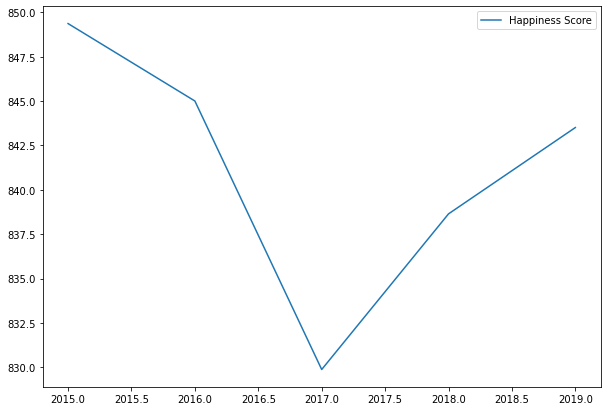

In [4]:
df1 = df.groupby(df.index)[["Happiness Score"]].sum()

df1.plot()

https://polit.ru/news/2018/09/12/happyness/ 
Мы можем увидеть на этом графике, что до 2017-го года уровень счастья в общем по миру падал - достиг минимальных показателей в 2017 году и пошел на повышение - можно предположить, что на общий уровень счастья повлияли войны и политические конфликты, возникающие в мире.

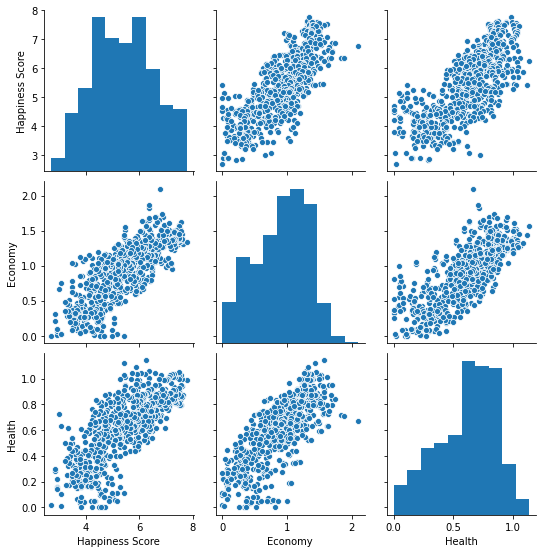

In [5]:
# Показатели счастья, здоровья, экономики (ввп)
sns_plot = sns.pairplot(df[["Happiness Score", "Economy", "Health"]])
sns_plot

На этом графике мы видим прямую позитивную зависимость между уровнем счастья и экономикой стран (ВВП) - очевидно, что в странах с высоким уровнем ввп выше уровень жизни, соответственно людям доступно большее количество благ, безопасность, образование и прочее, что повышает их уровень счастья

Так же мы видим позитивную корреляцию между уровнем счастья и здоровья - вместе с уровнем здоровья растет уровень счастья населения - тоже вполне очевидная зависимость, чем более человек чувствует себя здоровым, тем более он чувствует себя счастливым. Можно предположить, что в обратную сторону это тоже работает. 

In [9]:
# зависимость щедрости людей в разных странах от уровня счастья 

px.scatter_matrix(df, dimensions=["Generosity", "Economy"], color="Country")

По этому графику мы можем увидеть, что уровень щедрости населения слабо связан с экономикой страны. Можем предположить, что щедрость скорее зависит от социальных факторов, чем от экономического положения - видим что жители большинства стран имеют достаточно низкий уровень щедрости, при этом можем увидеть, что выбросы относительно основного количества имеют южно-азиатские страны - возможно это связано с религиозными убеждениями. 

<BarContainer object of 50 artists>

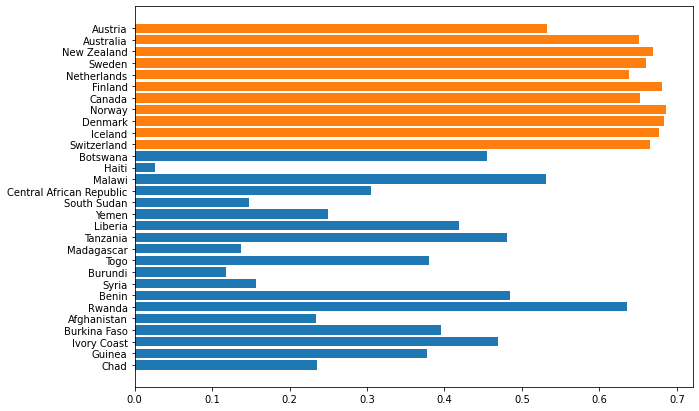

In [53]:
df1 = df.groupby(df.index)
plt.barh(df1.tail(10)["Country"], df1.tail(10)["Freedom"])
plt.barh(df1.head(10)["Country"], df1.head(10)["Freedom"])


Из результатов этого графика мы видим, что зависимость между уровнем счастья и ощущением совободы присутствует, но это не прямая зависимость - в странах с низким уровнем счастья уровень свободы может быть высоким - можно предположить, что это связано с анархией и неустойчивым режимом в стране - уровень жизни низкий, но население чувствует себя свободным в действиях и безнаказанным